In [1]:
import matplotlib.pyplot as plt
import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam, Adagrad, Adadelta, Adamax, SGD

import tensorflow as tf
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

%matplotlib inline

Using TensorFlow backend.


In [2]:
## Creating a Dataset
N_datapoints = 500000
n_labels = 100

X = np.random.random_integers(0,n_labels,size=(N_datapoints,2))
y = np.sum(X,axis=1)

## Normalizing the inputs
X = X/100.0

## Converting the Outputs into one-hot encoding (classification)
# y_OH = np.zeros((len(y),2*n_labels+1))
# for i, val in enumerate(y):
#     y_OH[i,val] = 1

lb = LabelBinarizer()
y_OH = lb.fit_transform(y)

# OHE =  OneHotEncoder()
# y_OH  = OHE.fit_transform(y[:])


## Train Test Split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_OH, test_size=0.2, random_state=42)

## Removal of 50 from the train set
ind50  = y_train[:,49] == 1
y50 = y_train[ind50]
y_train = y_train[~ind50,:]
x50 = X_train[ind50,:]
X_train = X_train[~ind50,:]

print 'Size of Training set', X_train.shape

/nfs/p4/ceusers/limpin/.venv2.7-gpu/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  """


Size of Training set (398037, 2)


In [3]:
## Creating the Deep-learning network
# Training Parameters 
learning_rate = 0.1
training_epochs = 3000
# decay_rate = learning_rate / training_epochs 
# momentum = 0.8
# adam = Adam(lr=learning_rate, decay=decay_rate)

batch_size = int(0.8*N_datapoints)

# Network Parameters
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 200 # 2nd layer number of neurons
n_classes = 2*n_labels+1 # MNIST classes for prediction(digits 0-9 )

Inp = Input(shape=(X_train.shape[1],))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
# x = Dropout(0.8)(x)
x = Dense(n_hidden_2, activation='tanh', name = "Dense_2")(x)
# x = Dropout(0.8)(x)
x = Dense(n_hidden_3, activation='tanh', name = "Dense_3")(x)
# x = Dropout(0.5)(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

model = Model(Inp, output)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
Dense_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               40401     
Total params: 71,001
Trainable params: 71,001
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [5]:
## Determine benchmark accuracy of test_set
print "Benchmark Accuracy of testset = %0.4f" %(sum(lb.inverse_transform(y_test) != 50)/float(len(y_test))) # Use Label Binarizer

Benchmark Accuracy of testset = 0.9948


In [6]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(X_test, y_test))

Train on 398037 samples, validate on 100000 samples
Epoch 1/3000
398037/398037 [==============================] - 27s - loss: 5.3035 - acc: 0.0064 - val_loss: 5.2955 - val_acc: 0.0055
Epoch 2/3000
398037/398037 [==============================] - 1s - loss: 5.2951 - acc: 0.0059 - val_loss: 5.2862 - val_acc: 0.0057
Epoch 3/3000
398037/398037 [==============================] - 1s - loss: 5.2857 - acc: 0.0059 - val_loss: 5.2763 - val_acc: 0.0059
Epoch 4/3000
398037/398037 [==============================] - 1s - loss: 5.2756 - acc: 0.0060 - val_loss: 5.2655 - val_acc: 0.0067
Epoch 5/3000
398037/398037 [==============================] - 1s - loss: 5.2647 - acc: 0.0061 - val_loss: 5.2537 - val_acc: 0.0091
Epoch 6/3000
398037/398037 [==============================] - 5s - loss: 5.2527 - acc: 0.0085 - val_loss: 5.2405 - val_acc: 0.0100
Epoch 7/3000
398037/398037 [==============================] - 8s - loss: 5.2394 - acc: 0.0096 - val_loss: 5.2260 - val_acc: 0.0101
Epoch 8/3000
398037/398037 [==

398037/398037 [==============================] - 1s - loss: 4.1504 - acc: 0.0355 - val_loss: 4.1476 - val_acc: 0.0369
Epoch 63/3000
398037/398037 [==============================] - 1s - loss: 4.1211 - acc: 0.0376 - val_loss: 4.1201 - val_acc: 0.0384
Epoch 64/3000
398037/398037 [==============================] - 1s - loss: 4.0924 - acc: 0.0389 - val_loss: 4.0932 - val_acc: 0.0411
Epoch 65/3000
398037/398037 [==============================] - 1s - loss: 4.0644 - acc: 0.0420 - val_loss: 4.0671 - val_acc: 0.0444
Epoch 66/3000
398037/398037 [==============================] - 1s - loss: 4.0372 - acc: 0.0456 - val_loss: 4.0416 - val_acc: 0.0492
Epoch 67/3000
398037/398037 [==============================] - 1s - loss: 4.0106 - acc: 0.0506 - val_loss: 4.0168 - val_acc: 0.0518
Epoch 68/3000
398037/398037 [==============================] - 1s - loss: 3.9846 - acc: 0.0535 - val_loss: 3.9927 - val_acc: 0.0640
Epoch 69/3000
398037/398037 [==============================] - 1s - loss: 3.9594 - acc: 0.

398037/398037 [==============================] - 1s - loss: 3.1251 - acc: 0.2199 - val_loss: 3.1776 - val_acc: 0.2216
Epoch 124/3000
398037/398037 [==============================] - 1s - loss: 3.1139 - acc: 0.2239 - val_loss: 3.1667 - val_acc: 0.2195
Epoch 125/3000
398037/398037 [==============================] - 1s - loss: 3.1029 - acc: 0.2209 - val_loss: 3.1564 - val_acc: 0.2302
Epoch 126/3000
398037/398037 [==============================] - 1s - loss: 3.0926 - acc: 0.2320 - val_loss: 3.1465 - val_acc: 0.2146
Epoch 127/3000
398037/398037 [==============================] - 1s - loss: 3.0826 - acc: 0.2167 - val_loss: 3.1353 - val_acc: 0.2355
Epoch 128/3000
398037/398037 [==============================] - 1s - loss: 3.0714 - acc: 0.2372 - val_loss: 3.1238 - val_acc: 0.2357
Epoch 129/3000
398037/398037 [==============================] - 1s - loss: 3.0598 - acc: 0.2369 - val_loss: 3.1142 - val_acc: 0.2310
Epoch 130/3000
398037/398037 [==============================] - 1s - loss: 3.0501 - 

398037/398037 [==============================] - 1s - loss: 2.6013 - acc: 0.4105 - val_loss: 2.6608 - val_acc: 0.4128
Epoch 185/3000
398037/398037 [==============================] - 1s - loss: 2.5950 - acc: 0.4144 - val_loss: 2.6544 - val_acc: 0.4100
Epoch 186/3000
398037/398037 [==============================] - 2s - loss: 2.5886 - acc: 0.4112 - val_loss: 2.6478 - val_acc: 0.4233
Epoch 187/3000
398037/398037 [==============================] - 1s - loss: 2.5819 - acc: 0.4253 - val_loss: 2.6411 - val_acc: 0.4214
Epoch 188/3000
398037/398037 [==============================] - 1s - loss: 2.5753 - acc: 0.4226 - val_loss: 2.6346 - val_acc: 0.4304
Epoch 189/3000
398037/398037 [==============================] - 1s - loss: 2.5687 - acc: 0.4316 - val_loss: 2.6283 - val_acc: 0.4334
Epoch 190/3000
398037/398037 [==============================] - 1s - loss: 2.5624 - acc: 0.4348 - val_loss: 2.6222 - val_acc: 0.4319
Epoch 191/3000
398037/398037 [==============================] - 1s - loss: 2.5563 - 

398037/398037 [==============================] - 1s - loss: 2.2746 - acc: 0.6146 - val_loss: 2.3374 - val_acc: 0.5904
Epoch 246/3000
398037/398037 [==============================] - 1s - loss: 2.2705 - acc: 0.5912 - val_loss: 2.3331 - val_acc: 0.6106
Epoch 247/3000
398037/398037 [==============================] - 1s - loss: 2.2661 - acc: 0.6146 - val_loss: 2.3283 - val_acc: 0.6058
Epoch 248/3000
398037/398037 [==============================] - 1s - loss: 2.2614 - acc: 0.6062 - val_loss: 2.3234 - val_acc: 0.6264
Epoch 249/3000
398037/398037 [==============================] - 1s - loss: 2.2564 - acc: 0.6302 - val_loss: 2.3184 - val_acc: 0.6512
Epoch 250/3000
398037/398037 [==============================] - 1s - loss: 2.2514 - acc: 0.6531 - val_loss: 2.3137 - val_acc: 0.6607
Epoch 251/3000
398037/398037 [==============================] - 1s - loss: 2.2467 - acc: 0.6631 - val_loss: 2.3094 - val_acc: 0.6627
Epoch 252/3000
398037/398037 [==============================] - 1s - loss: 2.2424 - 

398037/398037 [==============================] - 1s - loss: 2.0384 - acc: 0.7458 - val_loss: 2.1021 - val_acc: 0.7277
Epoch 307/3000
398037/398037 [==============================] - 1s - loss: 2.0342 - acc: 0.7298 - val_loss: 2.0982 - val_acc: 0.7449
Epoch 308/3000
398037/398037 [==============================] - 1s - loss: 2.0303 - acc: 0.7481 - val_loss: 2.0947 - val_acc: 0.7415
Epoch 309/3000
398037/398037 [==============================] - 1s - loss: 2.0267 - acc: 0.7446 - val_loss: 2.0915 - val_acc: 0.7403
Epoch 310/3000
398037/398037 [==============================] - 1s - loss: 2.0235 - acc: 0.7424 - val_loss: 2.0885 - val_acc: 0.7484
Epoch 311/3000
398037/398037 [==============================] - 1s - loss: 2.0205 - acc: 0.7521 - val_loss: 2.0857 - val_acc: 0.7316
Epoch 312/3000
398037/398037 [==============================] - 1s - loss: 2.0177 - acc: 0.7338 - val_loss: 2.0830 - val_acc: 0.7520
Epoch 313/3000
398037/398037 [==============================] - 1s - loss: 2.0150 - 

398037/398037 [==============================] - 1s - loss: 1.8551 - acc: 0.8036 - val_loss: 1.9202 - val_acc: 0.7835
Epoch 368/3000
398037/398037 [==============================] - 1s - loss: 1.8516 - acc: 0.7854 - val_loss: 1.9169 - val_acc: 0.8032
Epoch 369/3000
398037/398037 [==============================] - 1s - loss: 1.8482 - acc: 0.8056 - val_loss: 1.9138 - val_acc: 0.7938
Epoch 370/3000
398037/398037 [==============================] - 1s - loss: 1.8451 - acc: 0.7955 - val_loss: 1.9111 - val_acc: 0.7957
Epoch 371/3000
398037/398037 [==============================] - 1s - loss: 1.8424 - acc: 0.7975 - val_loss: 1.9087 - val_acc: 0.8033
Epoch 372/3000
398037/398037 [==============================] - 1s - loss: 1.8399 - acc: 0.8053 - val_loss: 1.9064 - val_acc: 0.7933
Epoch 373/3000
398037/398037 [==============================] - 1s - loss: 1.8376 - acc: 0.7949 - val_loss: 1.9042 - val_acc: 0.8069
Epoch 374/3000
398037/398037 [==============================] - 3s - loss: 1.8355 - 

398037/398037 [==============================] - 1s - loss: 1.7050 - acc: 0.8362 - val_loss: 1.7718 - val_acc: 0.8331
Epoch 429/3000
398037/398037 [==============================] - 1s - loss: 1.7025 - acc: 0.8356 - val_loss: 1.7722 - val_acc: 0.8093
Epoch 430/3000
398037/398037 [==============================] - 1s - loss: 1.7030 - acc: 0.8108 - val_loss: 1.7718 - val_acc: 0.8401
Epoch 431/3000
398037/398037 [==============================] - 1s - loss: 1.7025 - acc: 0.8429 - val_loss: 1.7681 - val_acc: 0.8082
Epoch 432/3000
398037/398037 [==============================] - 1s - loss: 1.6988 - acc: 0.8098 - val_loss: 1.7635 - val_acc: 0.8345
Epoch 433/3000
398037/398037 [==============================] - 1s - loss: 1.6942 - acc: 0.8371 - val_loss: 1.7607 - val_acc: 0.8301
Epoch 434/3000
398037/398037 [==============================] - 1s - loss: 1.6914 - acc: 0.8322 - val_loss: 1.7600 - val_acc: 0.8187
Epoch 435/3000
398037/398037 [==============================] - 1s - loss: 1.6907 - 

398037/398037 [==============================] - 3s - loss: 1.5808 - acc: 0.8646 - val_loss: 1.6523 - val_acc: 0.8248
Epoch 490/3000
398037/398037 [==============================] - 1s - loss: 1.5826 - acc: 0.8265 - val_loss: 1.6518 - val_acc: 0.8526
Epoch 491/3000
398037/398037 [==============================] - 1s - loss: 1.5820 - acc: 0.8552 - val_loss: 1.6469 - val_acc: 0.8354
Epoch 492/3000
398037/398037 [==============================] - 1s - loss: 1.5771 - acc: 0.8374 - val_loss: 1.6429 - val_acc: 0.8555
Epoch 493/3000
398037/398037 [==============================] - 1s - loss: 1.5731 - acc: 0.8578 - val_loss: 1.6426 - val_acc: 0.8610
Epoch 494/3000
398037/398037 [==============================] - 1s - loss: 1.5728 - acc: 0.8636 - val_loss: 1.6427 - val_acc: 0.8271
Epoch 495/3000
398037/398037 [==============================] - 1s - loss: 1.5730 - acc: 0.8288 - val_loss: 1.6400 - val_acc: 0.8593
Epoch 496/3000
398037/398037 [==============================] - 1s - loss: 1.5702 - 

398037/398037 [==============================] - 1s - loss: 1.4742 - acc: 0.8775 - val_loss: 1.5447 - val_acc: 0.8762
Epoch 551/3000
398037/398037 [==============================] - 1s - loss: 1.4745 - acc: 0.8782 - val_loss: 1.5472 - val_acc: 0.8371
Epoch 552/3000
398037/398037 [==============================] - 1s - loss: 1.4770 - acc: 0.8388 - val_loss: 1.5481 - val_acc: 0.8618
Epoch 553/3000
398037/398037 [==============================] - 1s - loss: 1.4779 - acc: 0.8648 - val_loss: 1.5449 - val_acc: 0.8342
Epoch 554/3000
398037/398037 [==============================] - 1s - loss: 1.4747 - acc: 0.8355 - val_loss: 1.5394 - val_acc: 0.8751
Epoch 555/3000
398037/398037 [==============================] - 1s - loss: 1.4691 - acc: 0.8772 - val_loss: 1.5350 - val_acc: 0.8758
Epoch 556/3000
398037/398037 [==============================] - 1s - loss: 1.4648 - acc: 0.8771 - val_loss: 1.5338 - val_acc: 0.8741
Epoch 557/3000
398037/398037 [==============================] - 1s - loss: 1.4636 - 

398037/398037 [==============================] - 1s - loss: 1.3853 - acc: 0.8736 - val_loss: 1.4509 - val_acc: 0.8821
Epoch 612/3000
398037/398037 [==============================] - 1s - loss: 1.3803 - acc: 0.8841 - val_loss: 1.4495 - val_acc: 0.8821
Epoch 613/3000
398037/398037 [==============================] - 1s - loss: 1.3789 - acc: 0.8841 - val_loss: 1.4507 - val_acc: 0.8761
Epoch 614/3000
398037/398037 [==============================] - 1s - loss: 1.3802 - acc: 0.8777 - val_loss: 1.4517 - val_acc: 0.8856
Epoch 615/3000
398037/398037 [==============================] - 1s - loss: 1.3810 - acc: 0.8879 - val_loss: 1.4500 - val_acc: 0.8683
Epoch 616/3000
398037/398037 [==============================] - 1s - loss: 1.3794 - acc: 0.8701 - val_loss: 1.4463 - val_acc: 0.8845
Epoch 617/3000
398037/398037 [==============================] - 1s - loss: 1.3756 - acc: 0.8869 - val_loss: 1.4426 - val_acc: 0.8802
Epoch 618/3000
398037/398037 [==============================] - 1s - loss: 1.3720 - 

398037/398037 [==============================] - 1s - loss: 1.3101 - acc: 0.8649 - val_loss: 1.3780 - val_acc: 0.8990
Epoch 673/3000
398037/398037 [==============================] - 1s - loss: 1.3070 - acc: 0.9014 - val_loss: 1.3701 - val_acc: 0.8834
Epoch 674/3000
398037/398037 [==============================] - 1s - loss: 1.2991 - acc: 0.8853 - val_loss: 1.3665 - val_acc: 0.8857
Epoch 675/3000
398037/398037 [==============================] - 1s - loss: 1.2956 - acc: 0.8880 - val_loss: 1.3690 - val_acc: 0.8945
Epoch 676/3000
398037/398037 [==============================] - 1s - loss: 1.2980 - acc: 0.8970 - val_loss: 1.3709 - val_acc: 0.8765
Epoch 677/3000
398037/398037 [==============================] - 1s - loss: 1.2999 - acc: 0.8779 - val_loss: 1.3679 - val_acc: 0.8965
Epoch 678/3000
398037/398037 [==============================] - 1s - loss: 1.2968 - acc: 0.8988 - val_loss: 1.3626 - val_acc: 0.8845
Epoch 679/3000
398037/398037 [==============================] - 1s - loss: 1.2916 - 

398037/398037 [==============================] - 1s - loss: 1.2297 - acc: 0.9038 - val_loss: 1.3023 - val_acc: 0.8830
Epoch 734/3000
398037/398037 [==============================] - 11s - loss: 1.2311 - acc: 0.8848 - val_loss: 1.3054 - val_acc: 0.9039
Epoch 735/3000
398037/398037 [==============================] - 1s - loss: 1.2340 - acc: 0.9067 - val_loss: 1.3101 - val_acc: 0.8663
Epoch 736/3000
398037/398037 [==============================] - 1s - loss: 1.2388 - acc: 0.8680 - val_loss: 1.3167 - val_acc: 0.8900
Epoch 737/3000
398037/398037 [==============================] - 1s - loss: 1.2454 - acc: 0.8934 - val_loss: 1.3218 - val_acc: 0.8343
Epoch 738/3000
398037/398037 [==============================] - 1s - loss: 1.2506 - acc: 0.8359 - val_loss: 1.3216 - val_acc: 0.8754
Epoch 739/3000
398037/398037 [==============================] - 3s - loss: 1.2503 - acc: 0.8785 - val_loss: 1.3114 - val_acc: 0.8450
Epoch 740/3000
398037/398037 [==============================] - 1s - loss: 1.2401 -

398037/398037 [==============================] - 1s - loss: 1.1600 - acc: 0.9061 - val_loss: 1.2307 - val_acc: 0.8965
Epoch 795/3000
398037/398037 [==============================] - 1s - loss: 1.1590 - acc: 0.8994 - val_loss: 1.2299 - val_acc: 0.9040
Epoch 796/3000
398037/398037 [==============================] - 1s - loss: 1.1582 - acc: 0.9070 - val_loss: 1.2291 - val_acc: 0.8940
Epoch 797/3000
398037/398037 [==============================] - 1s - loss: 1.1574 - acc: 0.8965 - val_loss: 1.2286 - val_acc: 0.9050
Epoch 798/3000
398037/398037 [==============================] - 4s - loss: 1.1569 - acc: 0.9080 - val_loss: 1.2282 - val_acc: 0.8904
Epoch 799/3000
398037/398037 [==============================] - 1s - loss: 1.1565 - acc: 0.8929 - val_loss: 1.2283 - val_acc: 0.9069
Epoch 800/3000
398037/398037 [==============================] - 1s - loss: 1.1566 - acc: 0.9102 - val_loss: 1.2288 - val_acc: 0.8891
Epoch 801/3000
398037/398037 [==============================] - 1s - loss: 1.1571 - 

398037/398037 [==============================] - 1s - loss: 1.0984 - acc: 0.9105 - val_loss: 1.1696 - val_acc: 0.9051
Epoch 856/3000
398037/398037 [==============================] - 1s - loss: 1.0976 - acc: 0.9079 - val_loss: 1.1690 - val_acc: 0.9096
Epoch 857/3000
398037/398037 [==============================] - 1s - loss: 1.0970 - acc: 0.9127 - val_loss: 1.1685 - val_acc: 0.9013
Epoch 858/3000
398037/398037 [==============================] - 1s - loss: 1.0965 - acc: 0.9040 - val_loss: 1.1685 - val_acc: 0.9103
Epoch 859/3000
398037/398037 [==============================] - 1s - loss: 1.0964 - acc: 0.9135 - val_loss: 1.1689 - val_acc: 0.8961
Epoch 860/3000
398037/398037 [==============================] - 1s - loss: 1.0970 - acc: 0.8987 - val_loss: 1.1706 - val_acc: 0.9119
Epoch 861/3000
398037/398037 [==============================] - 1s - loss: 1.0986 - acc: 0.9154 - val_loss: 1.1739 - val_acc: 0.8901
Epoch 862/3000
398037/398037 [==============================] - 1s - loss: 1.1020 - 

398037/398037 [==============================] - 1s - loss: 1.0432 - acc: 0.9121 - val_loss: 1.1145 - val_acc: 0.9119
Epoch 917/3000
398037/398037 [==============================] - 1s - loss: 1.0422 - acc: 0.9151 - val_loss: 1.1134 - val_acc: 0.9101
Epoch 918/3000
398037/398037 [==============================] - 1s - loss: 1.0411 - acc: 0.9130 - val_loss: 1.1125 - val_acc: 0.9121
Epoch 919/3000
398037/398037 [==============================] - 1s - loss: 1.0402 - acc: 0.9152 - val_loss: 1.1116 - val_acc: 0.9119
Epoch 920/3000
398037/398037 [==============================] - 1s - loss: 1.0393 - acc: 0.9148 - val_loss: 1.1107 - val_acc: 0.9113
Epoch 921/3000
398037/398037 [==============================] - 1s - loss: 1.0384 - acc: 0.9143 - val_loss: 1.1099 - val_acc: 0.9122
Epoch 922/3000
398037/398037 [==============================] - 1s - loss: 1.0376 - acc: 0.9153 - val_loss: 1.1091 - val_acc: 0.9102
Epoch 923/3000
398037/398037 [==============================] - 1s - loss: 1.0368 - 

398037/398037 [==============================] - 1s - loss: 0.9941 - acc: 0.9217 - val_loss: 1.0682 - val_acc: 0.9061
Epoch 978/3000
398037/398037 [==============================] - 1s - loss: 0.9957 - acc: 0.9089 - val_loss: 1.0664 - val_acc: 0.9180
Epoch 979/3000
398037/398037 [==============================] - 1s - loss: 0.9938 - acc: 0.9213 - val_loss: 1.0628 - val_acc: 0.9130
Epoch 980/3000
398037/398037 [==============================] - 1s - loss: 0.9902 - acc: 0.9161 - val_loss: 1.0612 - val_acc: 0.9133
Epoch 981/3000
398037/398037 [==============================] - 1s - loss: 0.9886 - acc: 0.9165 - val_loss: 1.0620 - val_acc: 0.9185
Epoch 982/3000
398037/398037 [==============================] - 1s - loss: 0.9894 - acc: 0.9217 - val_loss: 1.0625 - val_acc: 0.9082
Epoch 983/3000
398037/398037 [==============================] - 1s - loss: 0.9899 - acc: 0.9108 - val_loss: 1.0610 - val_acc: 0.9185
Epoch 984/3000
398037/398037 [==============================] - 1s - loss: 0.9884 - 

398037/398037 [==============================] - 1s - loss: 0.9442 - acc: 0.9176 - val_loss: 1.0162 - val_acc: 0.9182
Epoch 1039/3000
398037/398037 [==============================] - 1s - loss: 0.9434 - acc: 0.9217 - val_loss: 1.0155 - val_acc: 0.9143
Epoch 1040/3000
398037/398037 [==============================] - 1s - loss: 0.9427 - acc: 0.9177 - val_loss: 1.0147 - val_acc: 0.9184
Epoch 1041/3000
398037/398037 [==============================] - 1s - loss: 0.9419 - acc: 0.9219 - val_loss: 1.0140 - val_acc: 0.9142
Epoch 1042/3000
398037/398037 [==============================] - 1s - loss: 0.9412 - acc: 0.9175 - val_loss: 1.0132 - val_acc: 0.9187
Epoch 1043/3000
398037/398037 [==============================] - 1s - loss: 0.9404 - acc: 0.9222 - val_loss: 1.0125 - val_acc: 0.9141
Epoch 1044/3000
398037/398037 [==============================] - 1s - loss: 0.9397 - acc: 0.9174 - val_loss: 1.0118 - val_acc: 0.9191
Epoch 1045/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.9005 - acc: 0.9265 - val_loss: 0.9733 - val_acc: 0.9189
Epoch 1100/3000
398037/398037 [==============================] - 1s - loss: 0.9003 - acc: 0.9223 - val_loss: 0.9730 - val_acc: 0.9229
Epoch 1101/3000
398037/398037 [==============================] - 1s - loss: 0.8999 - acc: 0.9266 - val_loss: 0.9721 - val_acc: 0.9181
Epoch 1102/3000
398037/398037 [==============================] - 1s - loss: 0.8991 - acc: 0.9215 - val_loss: 0.9710 - val_acc: 0.9228
Epoch 1103/3000
398037/398037 [==============================] - 1s - loss: 0.8979 - acc: 0.9265 - val_loss: 0.9700 - val_acc: 0.9229
Epoch 1104/3000
398037/398037 [==============================] - 1s - loss: 0.8969 - acc: 0.9266 - val_loss: 0.9694 - val_acc: 0.9228
Epoch 1105/3000
398037/398037 [==============================] - 1s - loss: 0.8963 - acc: 0.9266 - val_loss: 0.9689 - val_acc: 0.9228
Epoch 1106/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.8648 - acc: 0.9328 - val_loss: 0.9413 - val_acc: 0.9174
Epoch 1161/3000
398037/398037 [==============================] - 6s - loss: 0.8681 - acc: 0.9208 - val_loss: 0.9474 - val_acc: 0.9284
Epoch 1162/3000
398037/398037 [==============================] - 1s - loss: 0.8741 - acc: 0.9319 - val_loss: 0.9570 - val_acc: 0.9035
Epoch 1163/3000
398037/398037 [==============================] - 1s - loss: 0.8839 - acc: 0.9068 - val_loss: 0.9720 - val_acc: 0.9289
Epoch 1164/3000
398037/398037 [==============================] - 1s - loss: 0.8987 - acc: 0.9326 - val_loss: 0.9893 - val_acc: 0.8746
Epoch 1165/3000
398037/398037 [==============================] - 1s - loss: 0.9162 - acc: 0.8766 - val_loss: 1.0039 - val_acc: 0.8970
Epoch 1166/3000
398037/398037 [==============================] - 1s - loss: 0.9306 - acc: 0.9007 - val_loss: 0.9999 - val_acc: 0.8510
Epoch 1167/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.8210 - acc: 0.9326 - val_loss: 0.8940 - val_acc: 0.9306
Epoch 1222/3000
398037/398037 [==============================] - 3s - loss: 0.8206 - acc: 0.9343 - val_loss: 0.8935 - val_acc: 0.9285
Epoch 1223/3000
398037/398037 [==============================] - 1s - loss: 0.8200 - acc: 0.9324 - val_loss: 0.8929 - val_acc: 0.9307
Epoch 1224/3000
398037/398037 [==============================] - 1s - loss: 0.8194 - acc: 0.9344 - val_loss: 0.8921 - val_acc: 0.9287
Epoch 1225/3000
398037/398037 [==============================] - 1s - loss: 0.8187 - acc: 0.9326 - val_loss: 0.8915 - val_acc: 0.9304
Epoch 1226/3000
398037/398037 [==============================] - 1s - loss: 0.8180 - acc: 0.9342 - val_loss: 0.8908 - val_acc: 0.9298
Epoch 1227/3000
398037/398037 [==============================] - 1s - loss: 0.8173 - acc: 0.9336 - val_loss: 0.8902 - val_acc: 0.9292
Epoch 1228/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.8850 - acc: 0.8117 - val_loss: 0.9768 - val_acc: 0.8318
Epoch 1283/3000
398037/398037 [==============================] - 1s - loss: 0.9033 - acc: 0.8363 - val_loss: 0.9549 - val_acc: 0.8129
Epoch 1284/3000
398037/398037 [==============================] - 1s - loss: 0.8816 - acc: 0.8145 - val_loss: 0.9006 - val_acc: 0.9335
Epoch 1285/3000
398037/398037 [==============================] - 1s - loss: 0.8269 - acc: 0.9375 - val_loss: 0.8585 - val_acc: 0.9294
Epoch 1286/3000
398037/398037 [==============================] - 1s - loss: 0.7849 - acc: 0.9333 - val_loss: 0.8681 - val_acc: 0.9226
Epoch 1287/3000
398037/398037 [==============================] - 3s - loss: 0.7945 - acc: 0.9261 - val_loss: 0.9030 - val_acc: 0.9332
Epoch 1288/3000
398037/398037 [==============================] - 1s - loss: 0.8293 - acc: 0.9371 - val_loss: 0.9100 - val_acc: 0.8999
Epoch 1289/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.7522 - acc: 0.9376 - val_loss: 0.8256 - val_acc: 0.9339
Epoch 1344/3000
398037/398037 [==============================] - 1s - loss: 0.7517 - acc: 0.9378 - val_loss: 0.8250 - val_acc: 0.9341
Epoch 1345/3000
398037/398037 [==============================] - 8s - loss: 0.7511 - acc: 0.9381 - val_loss: 0.8244 - val_acc: 0.9338
Epoch 1346/3000
398037/398037 [==============================] - 1s - loss: 0.7505 - acc: 0.9377 - val_loss: 0.8238 - val_acc: 0.9338
Epoch 1347/3000
398037/398037 [==============================] - 1s - loss: 0.7499 - acc: 0.9377 - val_loss: 0.8234 - val_acc: 0.9340
Epoch 1348/3000
398037/398037 [==============================] - 1s - loss: 0.7495 - acc: 0.9380 - val_loss: 0.8229 - val_acc: 0.9338
Epoch 1349/3000
398037/398037 [==============================] - 1s - loss: 0.7490 - acc: 0.9376 - val_loss: 0.8223 - val_acc: 0.9341
Epoch 1350/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 2s - loss: 0.7204 - acc: 0.9393 - val_loss: 0.7940 - val_acc: 0.9352
Epoch 1405/3000
398037/398037 [==============================] - 1s - loss: 0.7199 - acc: 0.9393 - val_loss: 0.7935 - val_acc: 0.9353
Epoch 1406/3000
398037/398037 [==============================] - 1s - loss: 0.7194 - acc: 0.9394 - val_loss: 0.7930 - val_acc: 0.9353
Epoch 1407/3000
398037/398037 [==============================] - 1s - loss: 0.7189 - acc: 0.9394 - val_loss: 0.7925 - val_acc: 0.9354
Epoch 1408/3000
398037/398037 [==============================] - 1s - loss: 0.7184 - acc: 0.9395 - val_loss: 0.7920 - val_acc: 0.9354
Epoch 1409/3000
398037/398037 [==============================] - 1s - loss: 0.7179 - acc: 0.9395 - val_loss: 0.7915 - val_acc: 0.9354
Epoch 1410/3000
398037/398037 [==============================] - 1s - loss: 0.7174 - acc: 0.9395 - val_loss: 0.7910 - val_acc: 0.9354
Epoch 1411/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.7299 - acc: 0.9449 - val_loss: 0.8002 - val_acc: 0.9248
Epoch 1466/3000
398037/398037 [==============================] - 2s - loss: 0.7261 - acc: 0.9284 - val_loss: 0.7655 - val_acc: 0.9339
Epoch 1467/3000
398037/398037 [==============================] - 1s - loss: 0.6912 - acc: 0.9377 - val_loss: 0.7854 - val_acc: 0.9387
Epoch 1468/3000
398037/398037 [==============================] - 1s - loss: 0.7112 - acc: 0.9426 - val_loss: 0.7929 - val_acc: 0.9279
Epoch 1469/3000
398037/398037 [==============================] - 1s - loss: 0.7189 - acc: 0.9316 - val_loss: 0.7659 - val_acc: 0.9411
Epoch 1470/3000
398037/398037 [==============================] - 1s - loss: 0.6917 - acc: 0.9452 - val_loss: 0.7743 - val_acc: 0.9431
Epoch 1471/3000
398037/398037 [==============================] - 1s - loss: 0.7000 - acc: 0.9473 - val_loss: 0.7852 - val_acc: 0.9269
Epoch 1472/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.6655 - acc: 0.9414 - val_loss: 0.7395 - val_acc: 0.9378
Epoch 1527/3000
398037/398037 [==============================] - 1s - loss: 0.6651 - acc: 0.9416 - val_loss: 0.7390 - val_acc: 0.9378
Epoch 1528/3000
398037/398037 [==============================] - 1s - loss: 0.6646 - acc: 0.9416 - val_loss: 0.7386 - val_acc: 0.9378
Epoch 1529/3000
398037/398037 [==============================] - 1s - loss: 0.6642 - acc: 0.9416 - val_loss: 0.7382 - val_acc: 0.9378
Epoch 1530/3000
398037/398037 [==============================] - 1s - loss: 0.6638 - acc: 0.9417 - val_loss: 0.7378 - val_acc: 0.9377
Epoch 1531/3000
398037/398037 [==============================] - 1s - loss: 0.6633 - acc: 0.9416 - val_loss: 0.7373 - val_acc: 0.9378
Epoch 1532/3000
398037/398037 [==============================] - 5s - loss: 0.6629 - acc: 0.9416 - val_loss: 0.7369 - val_acc: 0.9378
Epoch 1533/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.6402 - acc: 0.9429 - val_loss: 0.7144 - val_acc: 0.9389
Epoch 1588/3000
398037/398037 [==============================] - 1s - loss: 0.6398 - acc: 0.9429 - val_loss: 0.7140 - val_acc: 0.9389
Epoch 1589/3000
398037/398037 [==============================] - 1s - loss: 0.6394 - acc: 0.9429 - val_loss: 0.7136 - val_acc: 0.9389
Epoch 1590/3000
398037/398037 [==============================] - 1s - loss: 0.6390 - acc: 0.9429 - val_loss: 0.7132 - val_acc: 0.9389
Epoch 1591/3000
398037/398037 [==============================] - 1s - loss: 0.6386 - acc: 0.9429 - val_loss: 0.7128 - val_acc: 0.9389
Epoch 1592/3000
398037/398037 [==============================] - 1s - loss: 0.6382 - acc: 0.9429 - val_loss: 0.7124 - val_acc: 0.9389
Epoch 1593/3000
398037/398037 [==============================] - 1s - loss: 0.6378 - acc: 0.9429 - val_loss: 0.7120 - val_acc: 0.9389
Epoch 1594/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.6161 - acc: 0.9475 - val_loss: 0.6904 - val_acc: 0.9435
Epoch 1649/3000
398037/398037 [==============================] - 1s - loss: 0.6157 - acc: 0.9475 - val_loss: 0.6901 - val_acc: 0.9436
Epoch 1650/3000
398037/398037 [==============================] - 1s - loss: 0.6153 - acc: 0.9476 - val_loss: 0.6897 - val_acc: 0.9436
Epoch 1651/3000
398037/398037 [==============================] - 1s - loss: 0.6149 - acc: 0.9476 - val_loss: 0.6893 - val_acc: 0.9443
Epoch 1652/3000
398037/398037 [==============================] - 1s - loss: 0.6145 - acc: 0.9484 - val_loss: 0.6889 - val_acc: 0.9447
Epoch 1653/3000
398037/398037 [==============================] - 1s - loss: 0.6142 - acc: 0.9488 - val_loss: 0.6885 - val_acc: 0.9453
Epoch 1654/3000
398037/398037 [==============================] - 1s - loss: 0.6138 - acc: 0.9494 - val_loss: 0.6881 - val_acc: 0.9455
Epoch 1655/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.5930 - acc: 0.9517 - val_loss: 0.6676 - val_acc: 0.9474
Epoch 1710/3000
398037/398037 [==============================] - 1s - loss: 0.5927 - acc: 0.9517 - val_loss: 0.6672 - val_acc: 0.9474
Epoch 1711/3000
398037/398037 [==============================] - 1s - loss: 0.5923 - acc: 0.9517 - val_loss: 0.6669 - val_acc: 0.9474
Epoch 1712/3000
398037/398037 [==============================] - 1s - loss: 0.5919 - acc: 0.9517 - val_loss: 0.6665 - val_acc: 0.9474
Epoch 1713/3000
398037/398037 [==============================] - 1s - loss: 0.5916 - acc: 0.9517 - val_loss: 0.6661 - val_acc: 0.9475
Epoch 1714/3000
398037/398037 [==============================] - 1s - loss: 0.5912 - acc: 0.9518 - val_loss: 0.6658 - val_acc: 0.9475
Epoch 1715/3000
398037/398037 [==============================] - 1s - loss: 0.5908 - acc: 0.9518 - val_loss: 0.6654 - val_acc: 0.9475
Epoch 1716/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.5711 - acc: 0.9528 - val_loss: 0.6458 - val_acc: 0.9484
Epoch 1771/3000
398037/398037 [==============================] - 1s - loss: 0.5707 - acc: 0.9528 - val_loss: 0.6455 - val_acc: 0.9484
Epoch 1772/3000
398037/398037 [==============================] - 1s - loss: 0.5704 - acc: 0.9528 - val_loss: 0.6452 - val_acc: 0.9500
Epoch 1773/3000
398037/398037 [==============================] - 1s - loss: 0.5701 - acc: 0.9544 - val_loss: 0.6449 - val_acc: 0.9484
Epoch 1774/3000
398037/398037 [==============================] - 1s - loss: 0.5698 - acc: 0.9528 - val_loss: 0.6446 - val_acc: 0.9506
Epoch 1775/3000
398037/398037 [==============================] - 1s - loss: 0.5696 - acc: 0.9551 - val_loss: 0.6445 - val_acc: 0.9485
Epoch 1776/3000
398037/398037 [==============================] - 1s - loss: 0.5694 - acc: 0.9529 - val_loss: 0.6446 - val_acc: 0.9504
Epoch 1777/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.5571 - acc: 0.9558 - val_loss: 0.6377 - val_acc: 0.9452
Epoch 1832/3000
398037/398037 [==============================] - 1s - loss: 0.5626 - acc: 0.9494 - val_loss: 0.6309 - val_acc: 0.9497
Epoch 1833/3000
398037/398037 [==============================] - 1s - loss: 0.5557 - acc: 0.9540 - val_loss: 0.6363 - val_acc: 0.9504
Epoch 1834/3000
398037/398037 [==============================] - 1s - loss: 0.5611 - acc: 0.9550 - val_loss: 0.6298 - val_acc: 0.9507
Epoch 1835/3000
398037/398037 [==============================] - 1s - loss: 0.5546 - acc: 0.9553 - val_loss: 0.6347 - val_acc: 0.9441
Epoch 1836/3000
398037/398037 [==============================] - 1s - loss: 0.5595 - acc: 0.9486 - val_loss: 0.6291 - val_acc: 0.9505
Epoch 1837/3000
398037/398037 [==============================] - 1s - loss: 0.5539 - acc: 0.9553 - val_loss: 0.6332 - val_acc: 0.9500
Epoch 1838/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.5390 - acc: 0.9561 - val_loss: 0.6140 - val_acc: 0.9516
Epoch 1893/3000
398037/398037 [==============================] - 1s - loss: 0.5387 - acc: 0.9562 - val_loss: 0.6137 - val_acc: 0.9516
Epoch 1894/3000
398037/398037 [==============================] - 1s - loss: 0.5384 - acc: 0.9562 - val_loss: 0.6135 - val_acc: 0.9515
Epoch 1895/3000
398037/398037 [==============================] - 1s - loss: 0.5382 - acc: 0.9561 - val_loss: 0.6132 - val_acc: 0.9515
Epoch 1896/3000
398037/398037 [==============================] - 1s - loss: 0.5379 - acc: 0.9561 - val_loss: 0.6130 - val_acc: 0.9515
Epoch 1897/3000
398037/398037 [==============================] - 1s - loss: 0.5376 - acc: 0.9561 - val_loss: 0.6127 - val_acc: 0.9515
Epoch 1898/3000
398037/398037 [==============================] - 1s - loss: 0.5374 - acc: 0.9561 - val_loss: 0.6124 - val_acc: 0.9515
Epoch 1899/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.5230 - acc: 0.9565 - val_loss: 0.5982 - val_acc: 0.9518
Epoch 1954/3000
398037/398037 [==============================] - 1s - loss: 0.5228 - acc: 0.9565 - val_loss: 0.5980 - val_acc: 0.9518
Epoch 1955/3000
398037/398037 [==============================] - 1s - loss: 0.5225 - acc: 0.9565 - val_loss: 0.5977 - val_acc: 0.9518
Epoch 1956/3000
398037/398037 [==============================] - 1s - loss: 0.5222 - acc: 0.9565 - val_loss: 0.5974 - val_acc: 0.9518
Epoch 1957/3000
398037/398037 [==============================] - 1s - loss: 0.5220 - acc: 0.9565 - val_loss: 0.5972 - val_acc: 0.9518
Epoch 1958/3000
398037/398037 [==============================] - 1s - loss: 0.5217 - acc: 0.9565 - val_loss: 0.5969 - val_acc: 0.9518
Epoch 1959/3000
398037/398037 [==============================] - 1s - loss: 0.5215 - acc: 0.9565 - val_loss: 0.5967 - val_acc: 0.9518
Epoch 1960/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.5077 - acc: 0.9585 - val_loss: 0.5830 - val_acc: 0.9536
Epoch 2015/3000
398037/398037 [==============================] - 1s - loss: 0.5074 - acc: 0.9585 - val_loss: 0.5827 - val_acc: 0.9536
Epoch 2016/3000
398037/398037 [==============================] - 1s - loss: 0.5072 - acc: 0.9585 - val_loss: 0.5825 - val_acc: 0.9536
Epoch 2017/3000
398037/398037 [==============================] - 1s - loss: 0.5069 - acc: 0.9585 - val_loss: 0.5822 - val_acc: 0.9537
Epoch 2018/3000
398037/398037 [==============================] - 1s - loss: 0.5067 - acc: 0.9585 - val_loss: 0.5820 - val_acc: 0.9538
Epoch 2019/3000
398037/398037 [==============================] - 1s - loss: 0.5064 - acc: 0.9586 - val_loss: 0.5818 - val_acc: 0.9538
Epoch 2020/3000
398037/398037 [==============================] - 1s - loss: 0.5062 - acc: 0.9586 - val_loss: 0.5815 - val_acc: 0.9538
Epoch 2021/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4929 - acc: 0.9589 - val_loss: 0.5683 - val_acc: 0.9540
Epoch 2076/3000
398037/398037 [==============================] - 1s - loss: 0.4926 - acc: 0.9589 - val_loss: 0.5681 - val_acc: 0.9540
Epoch 2077/3000
398037/398037 [==============================] - 1s - loss: 0.4924 - acc: 0.9589 - val_loss: 0.5679 - val_acc: 0.9540
Epoch 2078/3000
398037/398037 [==============================] - 1s - loss: 0.4921 - acc: 0.9589 - val_loss: 0.5676 - val_acc: 0.9540
Epoch 2079/3000
398037/398037 [==============================] - 1s - loss: 0.4919 - acc: 0.9589 - val_loss: 0.5674 - val_acc: 0.9540
Epoch 2080/3000
398037/398037 [==============================] - 1s - loss: 0.4917 - acc: 0.9589 - val_loss: 0.5671 - val_acc: 0.9540
Epoch 2081/3000
398037/398037 [==============================] - 1s - loss: 0.4914 - acc: 0.9589 - val_loss: 0.5669 - val_acc: 0.9540
Epoch 2082/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4786 - acc: 0.9590 - val_loss: 0.5542 - val_acc: 0.9541
Epoch 2137/3000
398037/398037 [==============================] - 1s - loss: 0.4784 - acc: 0.9590 - val_loss: 0.5540 - val_acc: 0.9541
Epoch 2138/3000
398037/398037 [==============================] - 1s - loss: 0.4782 - acc: 0.9590 - val_loss: 0.5538 - val_acc: 0.9541
Epoch 2139/3000
398037/398037 [==============================] - 1s - loss: 0.4779 - acc: 0.9590 - val_loss: 0.5535 - val_acc: 0.9541
Epoch 2140/3000
398037/398037 [==============================] - 1s - loss: 0.4777 - acc: 0.9590 - val_loss: 0.5533 - val_acc: 0.9542
Epoch 2141/3000
398037/398037 [==============================] - 1s - loss: 0.4775 - acc: 0.9592 - val_loss: 0.5531 - val_acc: 0.9542
Epoch 2142/3000
398037/398037 [==============================] - 1s - loss: 0.4772 - acc: 0.9592 - val_loss: 0.5529 - val_acc: 0.9542
Epoch 2143/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4649 - acc: 0.9597 - val_loss: 0.5406 - val_acc: 0.9549
Epoch 2198/3000
398037/398037 [==============================] - 1s - loss: 0.4647 - acc: 0.9597 - val_loss: 0.5404 - val_acc: 0.9549
Epoch 2199/3000
398037/398037 [==============================] - 1s - loss: 0.4645 - acc: 0.9597 - val_loss: 0.5402 - val_acc: 0.9549
Epoch 2200/3000
398037/398037 [==============================] - 1s - loss: 0.4643 - acc: 0.9597 - val_loss: 0.5400 - val_acc: 0.9549
Epoch 2201/3000
398037/398037 [==============================] - 1s - loss: 0.4640 - acc: 0.9597 - val_loss: 0.5398 - val_acc: 0.9549
Epoch 2202/3000
398037/398037 [==============================] - 1s - loss: 0.4638 - acc: 0.9597 - val_loss: 0.5396 - val_acc: 0.9550
Epoch 2203/3000
398037/398037 [==============================] - 1s - loss: 0.4636 - acc: 0.9598 - val_loss: 0.5393 - val_acc: 0.9550
Epoch 2204/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4518 - acc: 0.9600 - val_loss: 0.5276 - val_acc: 0.9552
Epoch 2259/3000
398037/398037 [==============================] - 1s - loss: 0.4515 - acc: 0.9600 - val_loss: 0.5274 - val_acc: 0.9552
Epoch 2260/3000
398037/398037 [==============================] - 1s - loss: 0.4513 - acc: 0.9600 - val_loss: 0.5272 - val_acc: 0.9552
Epoch 2261/3000
398037/398037 [==============================] - 1s - loss: 0.4511 - acc: 0.9600 - val_loss: 0.5270 - val_acc: 0.9552
Epoch 2262/3000
398037/398037 [==============================] - 1s - loss: 0.4509 - acc: 0.9600 - val_loss: 0.5268 - val_acc: 0.9552
Epoch 2263/3000
398037/398037 [==============================] - 1s - loss: 0.4507 - acc: 0.9600 - val_loss: 0.5265 - val_acc: 0.9552
Epoch 2264/3000
398037/398037 [==============================] - 1s - loss: 0.4505 - acc: 0.9600 - val_loss: 0.5263 - val_acc: 0.9552
Epoch 2265/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4391 - acc: 0.9602 - val_loss: 0.5151 - val_acc: 0.9553
Epoch 2320/3000
398037/398037 [==============================] - 1s - loss: 0.4389 - acc: 0.9602 - val_loss: 0.5149 - val_acc: 0.9553
Epoch 2321/3000
398037/398037 [==============================] - 1s - loss: 0.4387 - acc: 0.9602 - val_loss: 0.5147 - val_acc: 0.9553
Epoch 2322/3000
398037/398037 [==============================] - 1s - loss: 0.4385 - acc: 0.9602 - val_loss: 0.5145 - val_acc: 0.9553
Epoch 2323/3000
398037/398037 [==============================] - 1s - loss: 0.4383 - acc: 0.9602 - val_loss: 0.5143 - val_acc: 0.9553
Epoch 2324/3000
398037/398037 [==============================] - 1s - loss: 0.4381 - acc: 0.9602 - val_loss: 0.5141 - val_acc: 0.9553
Epoch 2325/3000
398037/398037 [==============================] - 1s - loss: 0.4379 - acc: 0.9602 - val_loss: 0.5139 - val_acc: 0.9553
Epoch 2326/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4269 - acc: 0.9608 - val_loss: 0.5030 - val_acc: 0.9560
Epoch 2381/3000
398037/398037 [==============================] - 1s - loss: 0.4267 - acc: 0.9608 - val_loss: 0.5028 - val_acc: 0.9560
Epoch 2382/3000
398037/398037 [==============================] - 1s - loss: 0.4266 - acc: 0.9608 - val_loss: 0.5026 - val_acc: 0.9561
Epoch 2383/3000
398037/398037 [==============================] - 7s - loss: 0.4264 - acc: 0.9609 - val_loss: 0.5024 - val_acc: 0.9561
Epoch 2384/3000
398037/398037 [==============================] - 1s - loss: 0.4262 - acc: 0.9609 - val_loss: 0.5022 - val_acc: 0.9561
Epoch 2385/3000
398037/398037 [==============================] - 1s - loss: 0.4260 - acc: 0.9609 - val_loss: 0.5021 - val_acc: 0.9561
Epoch 2386/3000
398037/398037 [==============================] - 1s - loss: 0.4258 - acc: 0.9609 - val_loss: 0.5019 - val_acc: 0.9561
Epoch 2387/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4153 - acc: 0.9615 - val_loss: 0.4915 - val_acc: 0.9567
Epoch 2442/3000
398037/398037 [==============================] - 1s - loss: 0.4151 - acc: 0.9615 - val_loss: 0.4913 - val_acc: 0.9567
Epoch 2443/3000
398037/398037 [==============================] - 1s - loss: 0.4149 - acc: 0.9615 - val_loss: 0.4911 - val_acc: 0.9567
Epoch 2444/3000
398037/398037 [==============================] - 1s - loss: 0.4147 - acc: 0.9615 - val_loss: 0.4909 - val_acc: 0.9567
Epoch 2445/3000
398037/398037 [==============================] - 1s - loss: 0.4145 - acc: 0.9615 - val_loss: 0.4907 - val_acc: 0.9567
Epoch 2446/3000
398037/398037 [==============================] - 1s - loss: 0.4143 - acc: 0.9615 - val_loss: 0.4905 - val_acc: 0.9567
Epoch 2447/3000
398037/398037 [==============================] - 1s - loss: 0.4142 - acc: 0.9615 - val_loss: 0.4904 - val_acc: 0.9567
Epoch 2448/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4041 - acc: 0.9616 - val_loss: 0.4804 - val_acc: 0.9569
Epoch 2503/3000
398037/398037 [==============================] - 3s - loss: 0.4039 - acc: 0.9616 - val_loss: 0.4802 - val_acc: 0.9569
Epoch 2504/3000
398037/398037 [==============================] - 1s - loss: 0.4037 - acc: 0.9616 - val_loss: 0.4800 - val_acc: 0.9569
Epoch 2505/3000
398037/398037 [==============================] - 1s - loss: 0.4035 - acc: 0.9616 - val_loss: 0.4798 - val_acc: 0.9569
Epoch 2506/3000
398037/398037 [==============================] - 1s - loss: 0.4033 - acc: 0.9616 - val_loss: 0.4797 - val_acc: 0.9569
Epoch 2507/3000
398037/398037 [==============================] - 6s - loss: 0.4032 - acc: 0.9616 - val_loss: 0.4795 - val_acc: 0.9569
Epoch 2508/3000
398037/398037 [==============================] - 1s - loss: 0.4030 - acc: 0.9616 - val_loss: 0.4793 - val_acc: 0.9569
Epoch 2509/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.3933 - acc: 0.9619 - val_loss: 0.4697 - val_acc: 0.9572
Epoch 2564/3000
398037/398037 [==============================] - 1s - loss: 0.3931 - acc: 0.9619 - val_loss: 0.4695 - val_acc: 0.9572
Epoch 2565/3000
398037/398037 [==============================] - 1s - loss: 0.3930 - acc: 0.9619 - val_loss: 0.4694 - val_acc: 0.9572
Epoch 2566/3000
398037/398037 [==============================] - 2s - loss: 0.3928 - acc: 0.9619 - val_loss: 0.4692 - val_acc: 0.9572
Epoch 2567/3000
398037/398037 [==============================] - 1s - loss: 0.3926 - acc: 0.9619 - val_loss: 0.4690 - val_acc: 0.9572
Epoch 2568/3000
398037/398037 [==============================] - 1s - loss: 0.3924 - acc: 0.9619 - val_loss: 0.4689 - val_acc: 0.9572
Epoch 2569/3000
398037/398037 [==============================] - 1s - loss: 0.3923 - acc: 0.9619 - val_loss: 0.4687 - val_acc: 0.9572
Epoch 2570/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.3830 - acc: 0.9642 - val_loss: 0.4595 - val_acc: 0.9594
Epoch 2625/3000
398037/398037 [==============================] - 2s - loss: 0.3828 - acc: 0.9642 - val_loss: 0.4593 - val_acc: 0.9594
Epoch 2626/3000
398037/398037 [==============================] - 1s - loss: 0.3827 - acc: 0.9642 - val_loss: 0.4592 - val_acc: 0.9594
Epoch 2627/3000
398037/398037 [==============================] - 1s - loss: 0.3825 - acc: 0.9642 - val_loss: 0.4590 - val_acc: 0.9594
Epoch 2628/3000
398037/398037 [==============================] - 1s - loss: 0.3823 - acc: 0.9642 - val_loss: 0.4588 - val_acc: 0.9594
Epoch 2629/3000
398037/398037 [==============================] - 3s - loss: 0.3822 - acc: 0.9642 - val_loss: 0.4587 - val_acc: 0.9594
Epoch 2630/3000
398037/398037 [==============================] - 1s - loss: 0.3820 - acc: 0.9642 - val_loss: 0.4585 - val_acc: 0.9594
Epoch 2631/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.3731 - acc: 0.9645 - val_loss: 0.4497 - val_acc: 0.9597
Epoch 2686/3000
398037/398037 [==============================] - 1s - loss: 0.3729 - acc: 0.9645 - val_loss: 0.4495 - val_acc: 0.9597
Epoch 2687/3000
398037/398037 [==============================] - 1s - loss: 0.3728 - acc: 0.9645 - val_loss: 0.4494 - val_acc: 0.9597
Epoch 2688/3000
398037/398037 [==============================] - 1s - loss: 0.3726 - acc: 0.9645 - val_loss: 0.4492 - val_acc: 0.9597
Epoch 2689/3000
398037/398037 [==============================] - 1s - loss: 0.3724 - acc: 0.9645 - val_loss: 0.4491 - val_acc: 0.9597
Epoch 2690/3000
398037/398037 [==============================] - 1s - loss: 0.3723 - acc: 0.9645 - val_loss: 0.4489 - val_acc: 0.9597
Epoch 2691/3000
398037/398037 [==============================] - 1s - loss: 0.3721 - acc: 0.9645 - val_loss: 0.4487 - val_acc: 0.9597
Epoch 2692/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.3636 - acc: 0.9647 - val_loss: 0.4403 - val_acc: 0.9599
Epoch 2747/3000
398037/398037 [==============================] - 1s - loss: 0.3634 - acc: 0.9647 - val_loss: 0.4401 - val_acc: 0.9599
Epoch 2748/3000
398037/398037 [==============================] - 1s - loss: 0.3633 - acc: 0.9647 - val_loss: 0.4400 - val_acc: 0.9599
Epoch 2749/3000
398037/398037 [==============================] - 1s - loss: 0.3631 - acc: 0.9647 - val_loss: 0.4398 - val_acc: 0.9599
Epoch 2750/3000
398037/398037 [==============================] - 1s - loss: 0.3630 - acc: 0.9647 - val_loss: 0.4397 - val_acc: 0.9599
Epoch 2751/3000
398037/398037 [==============================] - 1s - loss: 0.3628 - acc: 0.9647 - val_loss: 0.4395 - val_acc: 0.9599
Epoch 2752/3000
398037/398037 [==============================] - 1s - loss: 0.3627 - acc: 0.9647 - val_loss: 0.4394 - val_acc: 0.9599
Epoch 2753/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.4543 - acc: 0.8677 - val_loss: 0.8607 - val_acc: 0.5403
Epoch 2808/3000
398037/398037 [==============================] - 1s - loss: 0.7871 - acc: 0.5396 - val_loss: 0.4692 - val_acc: 0.9640
Epoch 2809/3000
398037/398037 [==============================] - 1s - loss: 0.3923 - acc: 0.9693 - val_loss: 0.9175 - val_acc: 0.4779
Epoch 2810/3000
398037/398037 [==============================] - 1s - loss: 0.8426 - acc: 0.4783 - val_loss: 0.4656 - val_acc: 0.9570
Epoch 2811/3000
398037/398037 [==============================] - 1s - loss: 0.3888 - acc: 0.9610 - val_loss: 1.0111 - val_acc: 0.3276
Epoch 2812/3000
398037/398037 [==============================] - 1s - loss: 0.9363 - acc: 0.3257 - val_loss: 0.4949 - val_acc: 0.9550
Epoch 2813/3000
398037/398037 [==============================] - 1s - loss: 0.4184 - acc: 0.9598 - val_loss: 1.0452 - val_acc: 0.3739
Epoch 2814/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.3561 - acc: 0.9675 - val_loss: 0.4311 - val_acc: 0.9615
Epoch 2869/3000
398037/398037 [==============================] - 1s - loss: 0.3541 - acc: 0.9664 - val_loss: 0.4317 - val_acc: 0.9604
Epoch 2870/3000
398037/398037 [==============================] - 1s - loss: 0.3547 - acc: 0.9651 - val_loss: 0.4318 - val_acc: 0.9599
Epoch 2871/3000
398037/398037 [==============================] - 1s - loss: 0.3549 - acc: 0.9648 - val_loss: 0.4305 - val_acc: 0.9616
Epoch 2872/3000
398037/398037 [==============================] - 1s - loss: 0.3536 - acc: 0.9666 - val_loss: 0.4316 - val_acc: 0.9615
Epoch 2873/3000
398037/398037 [==============================] - 1s - loss: 0.3546 - acc: 0.9665 - val_loss: 0.4307 - val_acc: 0.9608
Epoch 2874/3000
398037/398037 [==============================] - 1s - loss: 0.3537 - acc: 0.9656 - val_loss: 0.4305 - val_acc: 0.9602
Epoch 2875/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.3480 - acc: 0.9660 - val_loss: 0.4249 - val_acc: 0.9613
Epoch 2930/3000
398037/398037 [==============================] - 1s - loss: 0.3479 - acc: 0.9663 - val_loss: 0.4248 - val_acc: 0.9618
Epoch 2931/3000
398037/398037 [==============================] - 2s - loss: 0.3478 - acc: 0.9669 - val_loss: 0.4247 - val_acc: 0.9620
Epoch 2932/3000
398037/398037 [==============================] - 1s - loss: 0.3477 - acc: 0.9671 - val_loss: 0.4246 - val_acc: 0.9620
Epoch 2933/3000
398037/398037 [==============================] - 3s - loss: 0.3476 - acc: 0.9671 - val_loss: 0.4245 - val_acc: 0.9618
Epoch 2934/3000
398037/398037 [==============================] - 1s - loss: 0.3475 - acc: 0.9668 - val_loss: 0.4244 - val_acc: 0.9617
Epoch 2935/3000
398037/398037 [==============================] - 1s - loss: 0.3474 - acc: 0.9666 - val_loss: 0.4243 - val_acc: 0.9618
Epoch 2936/3000
398037/398037 [==============================] - 1s - loss: 0.

398037/398037 [==============================] - 1s - loss: 0.3422 - acc: 0.9672 - val_loss: 0.4192 - val_acc: 0.9622
Epoch 2991/3000
398037/398037 [==============================] - 1s - loss: 0.3421 - acc: 0.9672 - val_loss: 0.4191 - val_acc: 0.9622
Epoch 2992/3000
398037/398037 [==============================] - 1s - loss: 0.3420 - acc: 0.9672 - val_loss: 0.4190 - val_acc: 0.9622
Epoch 2993/3000
398037/398037 [==============================] - 1s - loss: 0.3419 - acc: 0.9672 - val_loss: 0.4189 - val_acc: 0.9622
Epoch 2994/3000
398037/398037 [==============================] - 1s - loss: 0.3418 - acc: 0.9672 - val_loss: 0.4188 - val_acc: 0.9622
Epoch 2995/3000
398037/398037 [==============================] - 1s - loss: 0.3417 - acc: 0.9672 - val_loss: 0.4187 - val_acc: 0.9622
Epoch 2996/3000
398037/398037 [==============================] - 1s - loss: 0.3416 - acc: 0.9672 - val_loss: 0.4186 - val_acc: 0.9622
Epoch 2997/3000
398037/398037 [==============================] - 1s - loss: 0.

In [7]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.figure(figsize=(20,8))
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

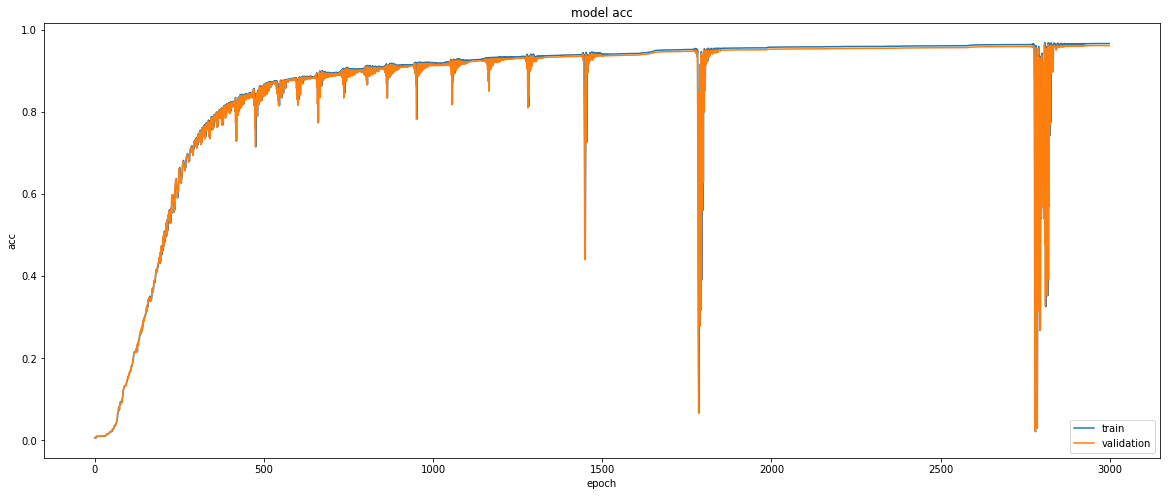

In [8]:
plot_train(history)

In [9]:
preds = model.predict(x50)
print 'Blind testing accuracy:', (sum(lb.inverse_transform(preds)==50) / float(preds.shape[0]))

Blind testing accuracy: 0.49465104432


In [ ]:
# Second try with variable learning rate
learning_rate = 0.8
training_epochs = 3000
decay_rate = learning_rate / training_epochs 
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(X_test, y_test))

In [ ]:
plot_train(history)